In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import textwrap
import math
from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image

In [2]:
#Parameterwahl

# Anzahl der Karten pro Blatt
anzahl_karten_horizont = 4
anzahl_karten_vertikal = 4

#Schriftgrößen
font_titel = 12 
font_text = 8
font_type = 6

#Breite für Zeilenumbrüche
width_titel = 16
width_text = 30

#Definierter Standartabstand
spacing = 5

#Dateiname
csv_name = 'DnC Card Table - cards.csv'

#Dataframe aller Karten
df = pd.read_csv(csv_name)

In [3]:
# Größe eines DIN A4 Blattes in mm
breite_A4 = 210 
höhe_A4 = 297   

# Berechnung der Kartengröße
karte_breite = breite_A4 / anzahl_karten_horizont
karte_höhe = höhe_A4 / anzahl_karten_vertikal

# Anzahl der Karten pro Seite
karten_pro_seite = anzahl_karten_horizont * anzahl_karten_vertikal

# Hilfsfunktion zum Zeichnen einer Karte
def zeichne_karte(ax, x, y, row):
    text_y_pos = y + karte_höhe - (2 * spacing)  # Startpunkt für den Text, oben in der Karte
    
    # Name fett oben
    name_text = textwrap.fill(row['Card Name'], width=width_titel)  # Breite dynamisch anpassen
    num_name_lines = name_text.count("\n") + 1  # Anzahl der Textzeilen
    text_y_pos -= spacing * (num_name_lines-1)
    ax.text(x + spacing, text_y_pos, name_text, fontsize=font_titel, weight='bold', ha='left')
    text_y_pos -= spacing
    
    # Type oben rechts
    ax.text(x + karte_breite - spacing, y + karte_höhe - spacing, row['Type'], fontsize=font_type, ha='right')
    
    # Waagerechter Strich als Trennlinie (oberhalb des Bildes)
    ax.plot([x + spacing, x + karte_breite - spacing], [text_y_pos, text_y_pos], color='black', lw=2)
    text_y_pos -= spacing / 2  # Platz für die Trennlinie halbiert
    
    # Platz für das Bild (waagerecht mittig auf der Karte)
    image_height = karte_höhe / 3  # Höhe des Bildes entspricht einem Drittel der Karte
    image_y_min = text_y_pos - image_height  # Platzierung des Bildes direkt unter der oberen Trennlinie
    image_y_max = text_y_pos  # Bild endet an der aktuellen Textposition
    image_center_x = x + karte_breite / 2  # Waagerechte Mitte der Karte

    try:
        # Bild laden und skalieren
        img = Image.open("test_image.jpg")  # Beispielbild, hier Pfad verwenden
        img_aspect = img.width / img.height
        image_width = image_height * img_aspect  # Breite des Bildes proportional skalieren
        
        # Berechnung der Extent-Koordinaten für das Bild
        image_x_min = image_center_x - image_width / 2
        image_x_max = image_center_x + image_width / 2
        
        # Bild im Plot anzeigen
        ax.imshow(img, extent=(image_x_min, image_x_max, image_y_min, image_y_max), zorder=1)
    except FileNotFoundError:
        print("Fehler: Das Bild 'test_image.jpg' wurde nicht gefunden.")
    
    # Text beginnt direkt unter dem Bild
    text_y_pos = image_y_min - spacing / 2  # Abstand halbiert

    # Waagerechter Strich unterhalb des Bildes
    ax.plot([x + spacing, x + karte_breite - spacing], [text_y_pos, text_y_pos], color='black', lw=2)
    text_y_pos -= spacing  # Abstand zur Trennlinie halbiert
    
    # Effect weiter unten, Zeilenumbruch an geeigneter Stelle
    effect_text = textwrap.fill(row['Effect'], width=width_text)  # Breite dynamisch anpassen
    num_effect_lines = effect_text.count("\n") + 1  # Anzahl der Textzeilen
    text_y_pos -= spacing * (num_effect_lines-1)
    ax.text(x + spacing, text_y_pos, effect_text, fontsize=font_text, ha='left')
    text_y_pos -= spacing

    # Range (falls vorhanden)
    if not pd.isna(row['Range']):
        ax.text(x + spacing, text_y_pos, f"Range: {int(row['Range'])}", fontsize=font_text, ha='left')
        text_y_pos -= spacing  # Platz für Range
    
    # W6 (falls vorhanden)
    if not pd.isna(row['W6']):
        ax.text(x + spacing, text_y_pos, f"W6: {int(row['W6'])}", fontsize=font_text, ha='left')
        text_y_pos -= spacing  # Platz für W6
    
    # Armor, Block, Parry, Evade (falls vorhanden)
    attributes = []
    if not pd.isna(row['Armor']):
        attributes.append(f"Armor: {int(row['Armor'])}")
    if not pd.isna(row['Block']):
        attributes.append(f"Block: {int(row['Block'])}")
    if not pd.isna(row['Parry']):
        attributes.append(f"Parry: {int(row['Parry'])}")
    if not pd.isna(row['Evade']):
        attributes.append(f"Evade: {int(row['Evade'])}")
    
    if attributes:
        attributes_text = ", ".join(attributes)
        attributes_text_wrapped = textwrap.fill(attributes_text, width=width_text)
        num_attributes_lines = attributes_text_wrapped.count("\n") + 1  # Anzahl der Zeilen
        text_y_pos -= spacing * (num_attributes_lines-1)
        ax.text(x + spacing, text_y_pos, attributes_text_wrapped, fontsize=font_text, ha='left')
        text_y_pos -= spacing

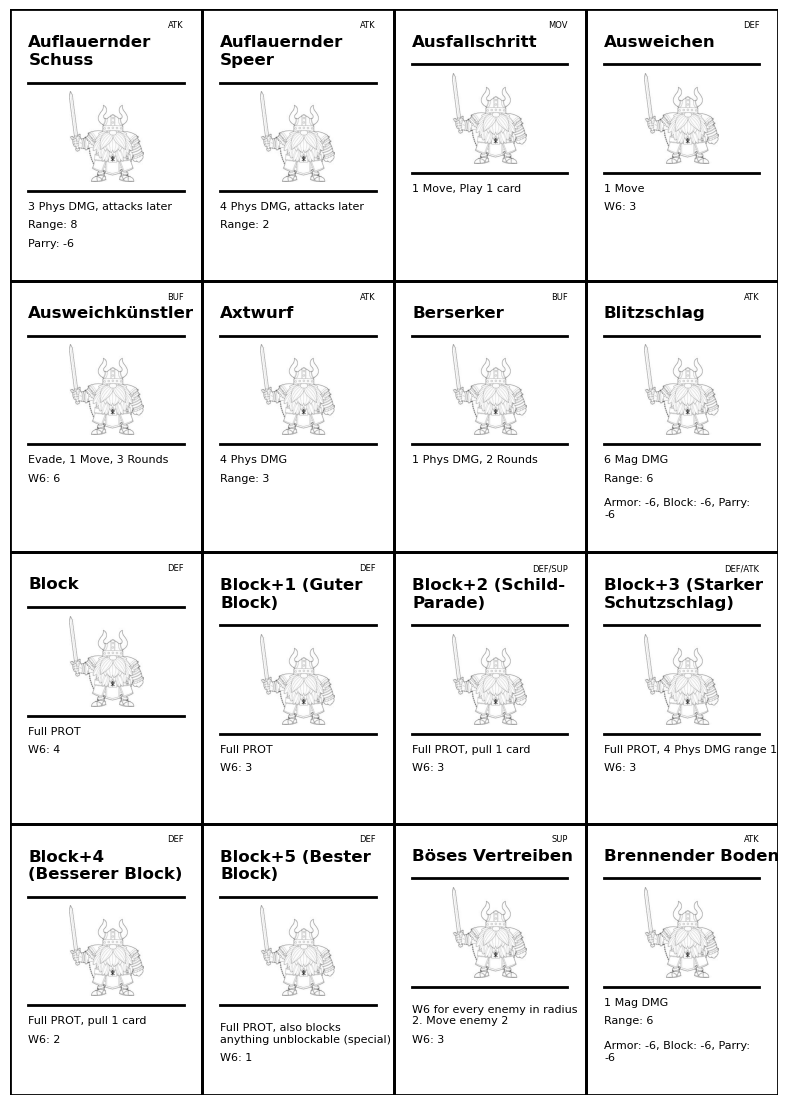

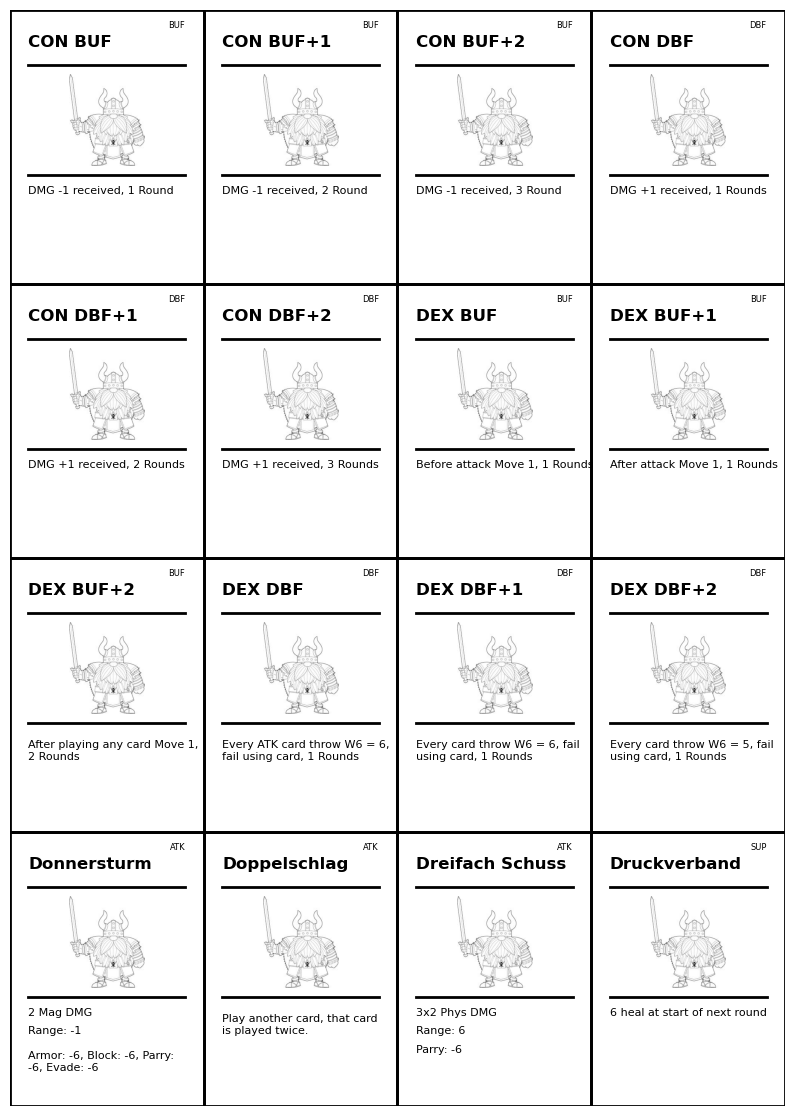

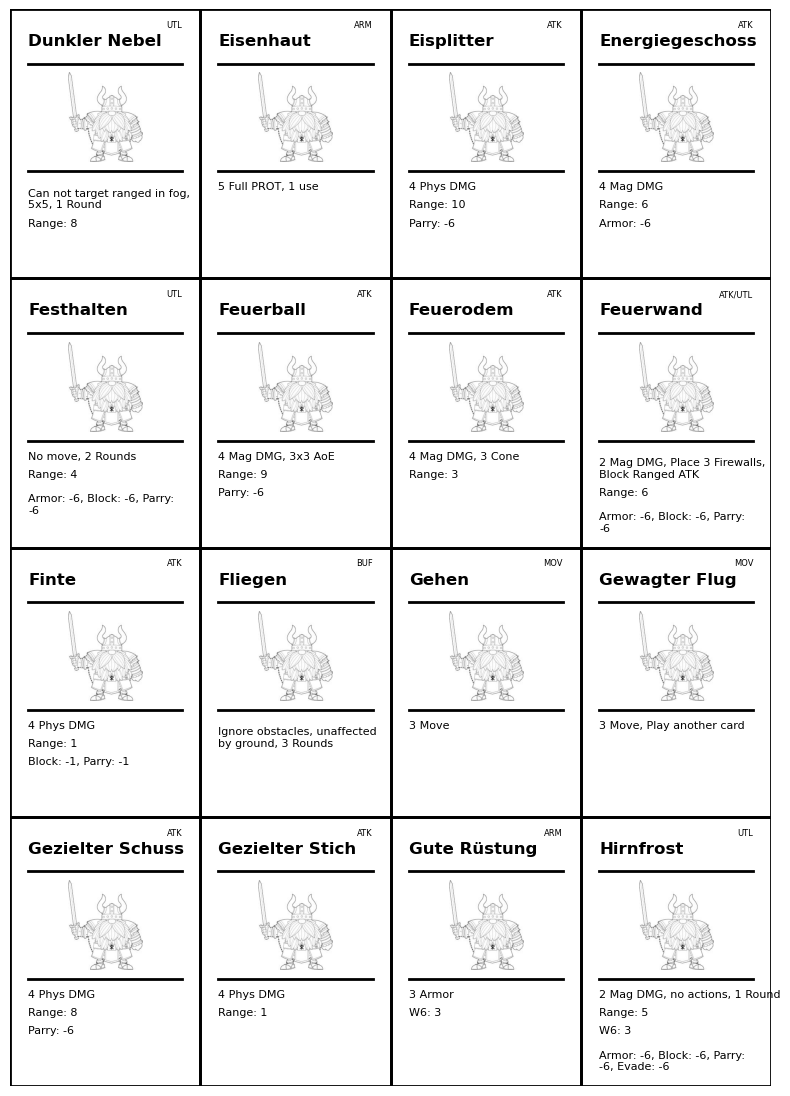

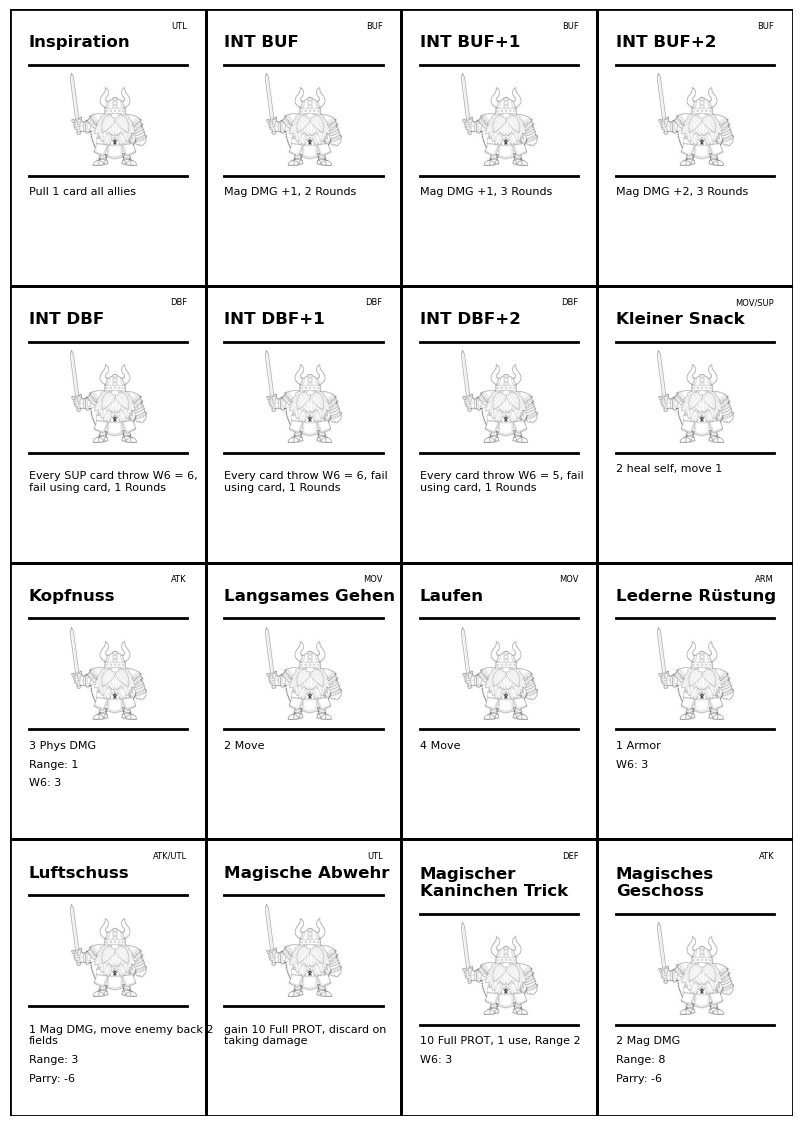

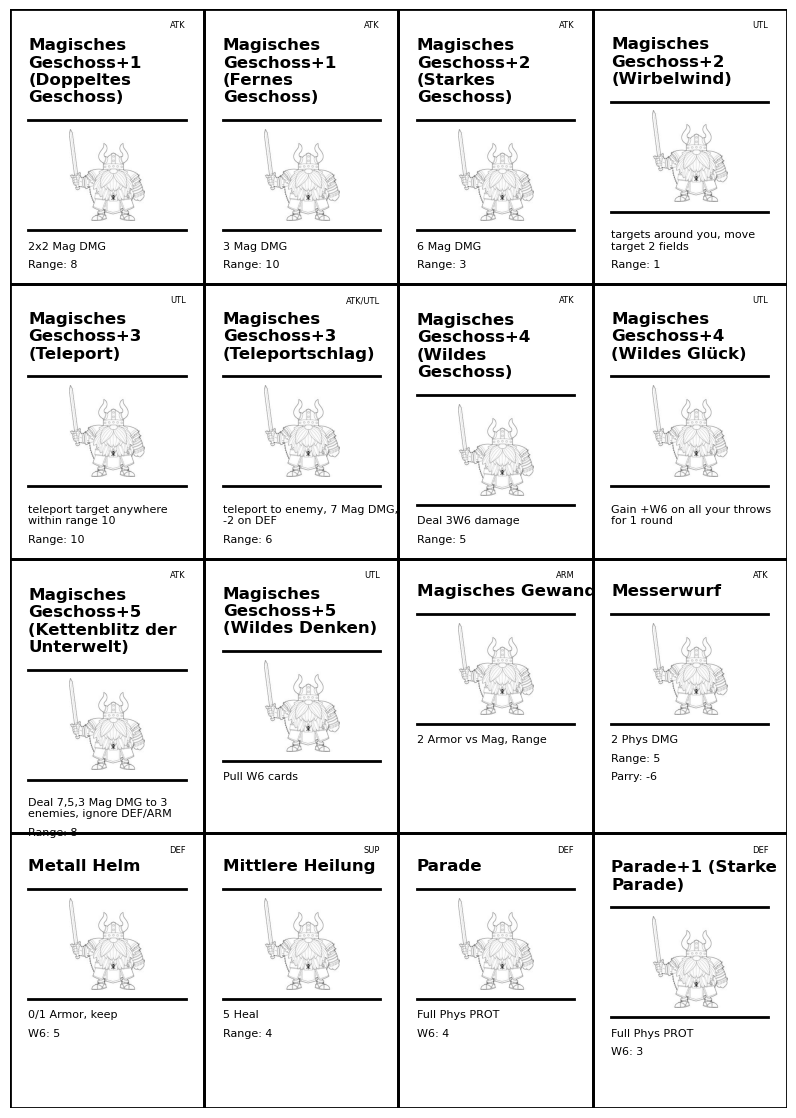

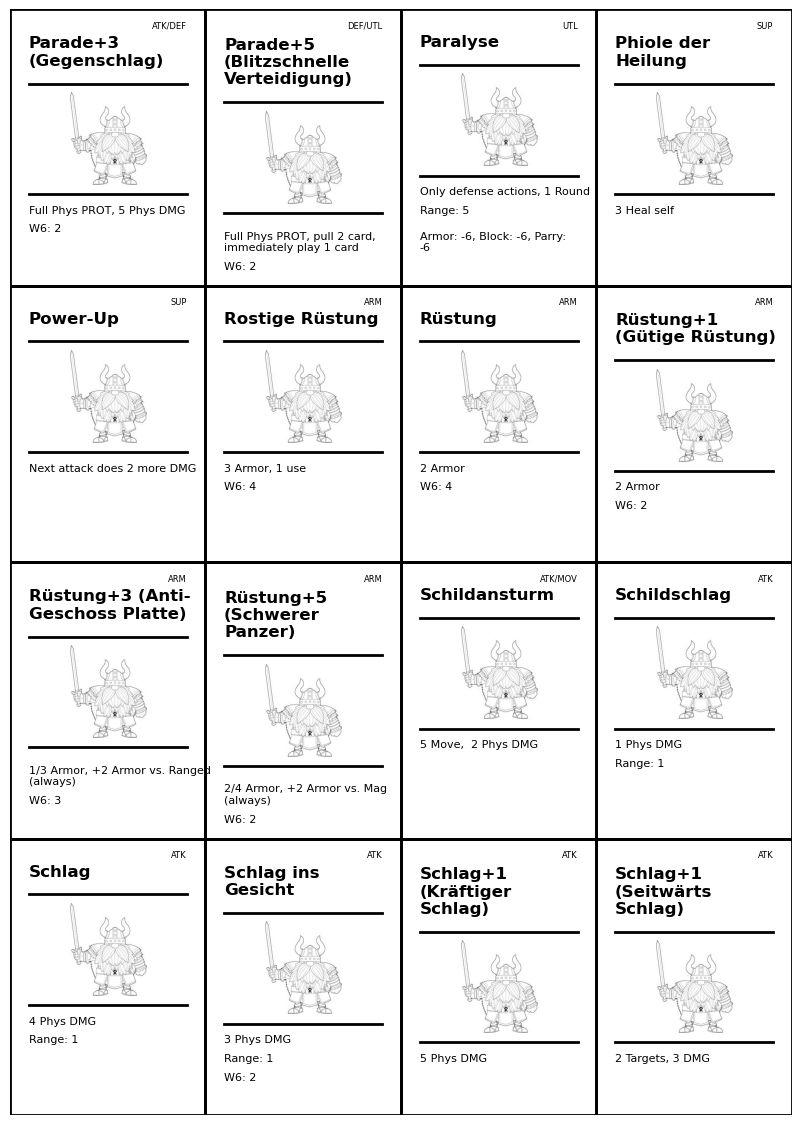

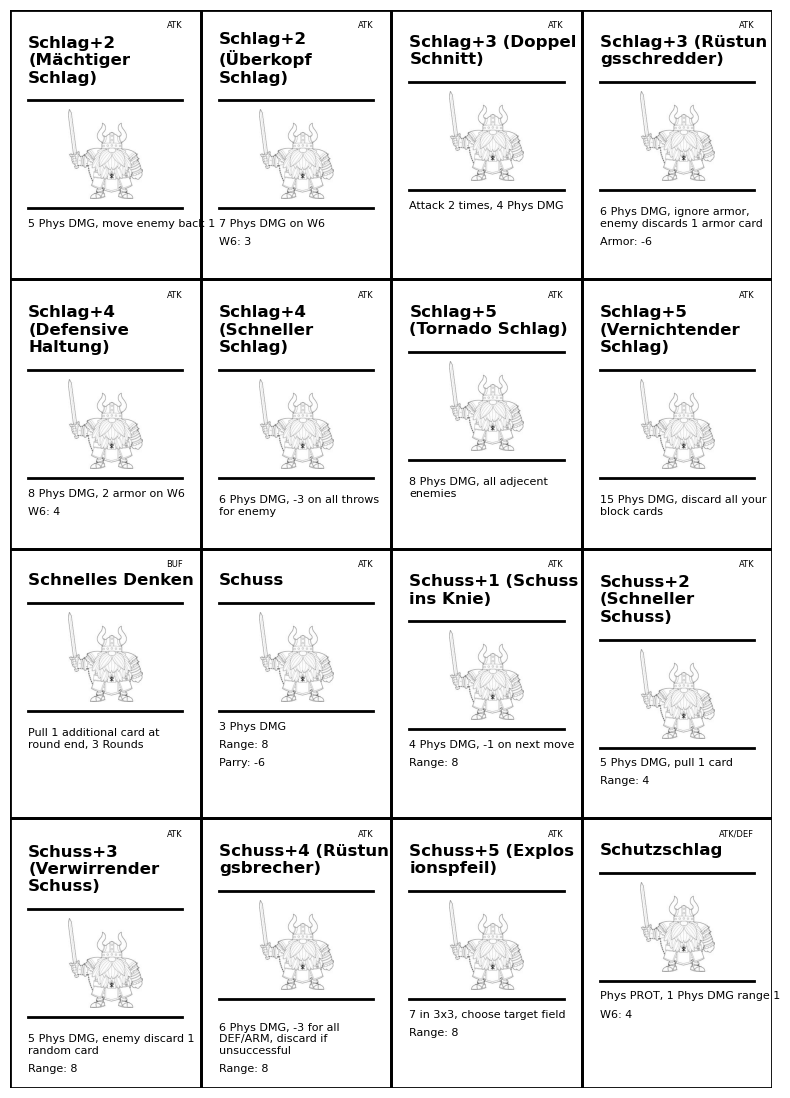

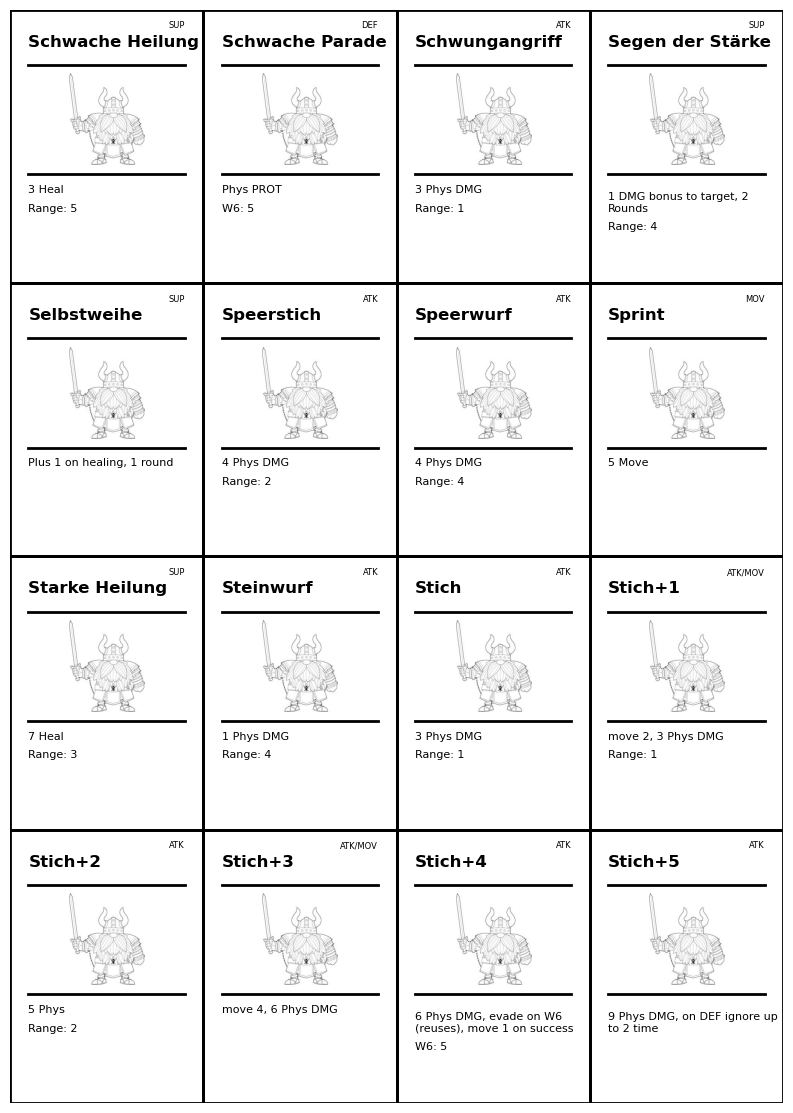

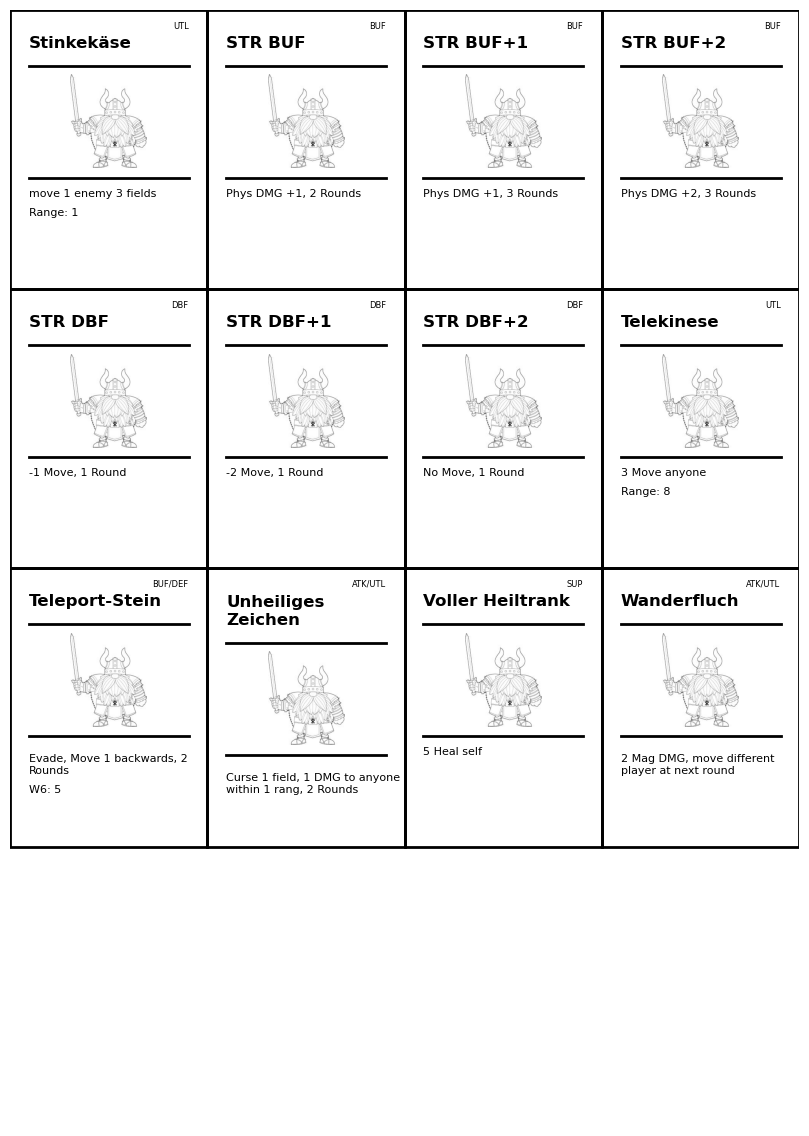

In [4]:
#printen aller Karten (zum Abgleich ob es so aussieht, wie man wollte)

# Anzahl der Seiten berechnen
anzahl_seiten = (len(df) + karten_pro_seite - 1) // karten_pro_seite  # Rundet nach oben

# Karten auf mehreren Seiten zeichnen
for seite in range(anzahl_seiten):
    fig, ax = plt.subplots(figsize=(breite_A4 / 25.4, höhe_A4 / 25.4))  # Konvertiere mm in Zoll
    ax.set_xlim(0, breite_A4)
    ax.set_ylim(0, höhe_A4)
    ax.axis('off')  # Achsen ausblenden
    
    # Zeichne Karten für diese Seite
    for karten_index in range(karten_pro_seite):
        global_index = seite * karten_pro_seite + karten_index
        
        # Stoppe, wenn alle Karten gezeichnet wurden
        if global_index >= len(df):
            break
        
        row = df.iloc[global_index]
        
        # Berechne die Position der Karte
        i = karten_index % anzahl_karten_horizont
        j = karten_index // anzahl_karten_horizont
        x = i * karte_breite
        y = (anzahl_karten_vertikal - j - 1) * karte_höhe  # Y umgekehrt wegen des Koordinatensystems
        
        # Zeichne eine Karte (Rechteck)
        rect = patches.Rectangle((x, y), karte_breite, karte_höhe, edgecolor='black', facecolor='none', lw=2)
        ax.add_patch(rect)  # Rechteck sichtbar machen
        
        # Zeichne die Inhalte der Karte
        zeichne_karte(ax, x, y, row)
    fig.tight_layout()
    # Anzeigen der resultierenden Grafik
    plt.show()

In [5]:
def drucke_karten_mit_ids(df, id_liste, no_id=False):
    if no_id:
        # Verwende die Einträge der Liste als Zeilenindizes
        gefilterte_karten = df.iloc[id_liste].reset_index(drop=True)
    else:
        # Verwende die Spalte 'CID' und filtere entsprechend der Liste
        gefilterte_karten = pd.concat([df[df['CID'] == cid] for cid in id_liste], ignore_index=True)

    # Anzahl der Seiten berechnen
    anzahl_seiten = (len(gefilterte_karten) + karten_pro_seite - 1) // karten_pro_seite  # Rundet nach oben

    # Karten auf mehreren Seiten zeichnen
    for seite in range(anzahl_seiten):
        fig, ax = plt.subplots(figsize=(breite_A4 / 25.4, höhe_A4 / 25.4))  # Konvertiere mm in Zoll
        ax.set_xlim(0, breite_A4)
        ax.set_ylim(0, höhe_A4)
        ax.axis('off')  # Achsen ausblenden
        
        # Zeichne Karten für diese Seite
        for karten_index in range(karten_pro_seite):
            global_index = seite * karten_pro_seite + karten_index
            
            # Stoppe, wenn alle Karten gezeichnet wurden
            if global_index >= len(gefilterte_karten):
                break
            
            row = gefilterte_karten.iloc[global_index]
            
            # Berechne die Position der Karte
            i = karten_index % anzahl_karten_horizont
            j = karten_index // anzahl_karten_horizont
            x = i * karte_breite
            y = (anzahl_karten_vertikal - j - 1) * karte_höhe  # Y umgekehrt wegen des Koordinatensystems
            
            # Zeichne eine Karte (Rechteck)
            rect = patches.Rectangle((x, y), karte_breite, karte_höhe, edgecolor='black', facecolor='none', lw=2)
            ax.add_patch(rect)  # Rechteck sichtbar machen
            
            # Zeichne die Inhalte der Karte
            zeichne_karte(ax, x, y, row)
        
        fig.tight_layout()
        # Anzeigen der resultierenden Grafik
        plt.show()

In [6]:
def erstelle_pdf(df, id_liste, no_id=False, dateiname='karten.pdf'):
    if no_id:
        # Verwende die Einträge der Liste als Zeilenindizes
        gefilterte_karten = df.iloc[id_liste].reset_index(drop=True)
    else:
        # Verwende die Spalte 'CID' und filtere entsprechend der Liste
        gefilterte_karten = pd.concat([df[df['CID'] == cid] for cid in id_liste], ignore_index=True)

    # Anzahl der Seiten berechnen
    anzahl_seiten = (len(gefilterte_karten) + karten_pro_seite - 1) // karten_pro_seite  # Rundet nach oben

    with PdfPages(dateiname) as pdf_pages:
        # Karten auf mehreren Seiten zeichnen
        for seite in range(anzahl_seiten):
            fig, ax = plt.subplots(figsize=(breite_A4 / 25.4, höhe_A4 / 25.4))  # Konvertiere mm in Zoll
            ax.set_xlim(0, breite_A4)
            ax.set_ylim(0, höhe_A4)
            ax.axis('off')  # Achsen ausblenden
            
            # Zeichne Karten für diese Seite
            for karten_index in range(karten_pro_seite):
                global_index = seite * karten_pro_seite + karten_index
                
                # Stoppe, wenn alle Karten gezeichnet wurden
                if global_index >= len(gefilterte_karten):
                    break
                
                row = gefilterte_karten.iloc[global_index]
                
                # Berechne die Position der Karte
                i = karten_index % anzahl_karten_horizont
                j = karten_index // anzahl_karten_horizont
                x = i * karte_breite
                y = (anzahl_karten_vertikal - j - 1) * karte_höhe  # Y umgekehrt wegen des Koordinatensystems
                
                # Zeichne eine Karte (Rechteck)
                rect = patches.Rectangle((x, y), karte_breite, karte_höhe, edgecolor='black', facecolor='none', lw=2)
                ax.add_patch(rect)  # Rechteck sichtbar machen
                
                # Zeichne die Inhalte der Karte
                zeichne_karte(ax, x, y, row)
            
            # Seite zu PDF hinzufügen
            fig.tight_layout()
            pdf_pages.savefig(fig, bbox_inches='tight')
            plt.close(fig)

    print(f"PDF erfolgreich erstellt: {dateiname}")

In [14]:
#borbosch
liste = [25, 33, 6, 9, 9, 9, 90, 91, 111, 92, 92, 92, 5, 113, 114, 87, 87, 87, 46, 57, 85, 112, 112, 120, 112, 112, 116, 56, 76, 76 ]
dateiname = 'borbosch_splitterhand.pdf'
erstelle_pdf(df, liste, dateiname=dateiname, no_id=True)

PDF erfolgreich erstellt: borbosch_splitterhand.pdf


In [11]:
#eragünth
liste = [38, 41, 52, 106, 106, 106, 0, 30, 44, 117, 1, 79, 118, 123, 59, 42, 42, 59, 59, 57, 121, 36, 36, 3, 119, 119, 83, 31, 31]
dateiname = 'eragünth.pdf'
erstelle_pdf(df, liste, dateiname=dateiname, no_id=True)

PDF erfolgreich erstellt: eragünth.pdf


In [13]:
#durchschnittsmensch
liste = [104, 48, 92, 92, 122, 122, 40, 78, 2, 122, 122, 122, 113, 45, 86, 86, 86, 42, 57, 85, 83, 31, 31, 93, 93, 85, 3, 119, 119]
dateiname = 'gabiel_dünnther.pdf'
erstelle_pdf(df, liste, dateiname=dateiname, no_id=True)

PDF erfolgreich erstellt: gabiel_dünnther.pdf


In [15]:
#zwergenkrieger
liste = [25, 33, 94, 94, 94, 5, 113, 114, 9, 9, 9, 90, 91, 111, 87, 87, 87, 46, 57, 85, 83, 31, 31, 93, 93, 85, 56, 76, 76]
dateiname = 'brombur_steinfaust.pdf'
erstelle_pdf(df, liste, dateiname=dateiname, no_id=True)

PDF erfolgreich erstellt: brombur_steinfaust.pdf


In [16]:
#waldläufer
liste = [38, 41, 52, 106, 106, 106, 0, 30, 123, 123, 123, 113, 45, 2, 59, 42, 42, 59, 59, 57, 55, 55, 128, 121, 36, 36, 3, 119, 119]
dateiname = 'draconia_taanxiaxirrian_hiythas.pdf'
erstelle_pdf(df, liste, dateiname=dateiname, no_id=True)

PDF erfolgreich erstellt: draconia_taanxiaxirrian_hiythas.pdf


In [7]:
#gehkarten
liste = [57, 57, 42, 42, 58, 58]
dateiname = 'gehkarten.pdf'
erstelle_pdf(df, liste, dateiname=dateiname, no_id=True)

PDF erfolgreich erstellt: gehkarten.pdf


In [8]:
#magier
liste = [25, 26, 49, 50, 51, 8, 8, 8, 90, 91, 111, 104, 48, 59, 42, 42, 59, 59, 57, 71, 73, 7, 15, 60, 61, 62, 61, 135, 35, 135, 82, 121, 136, 136]
dateiname = 'gargamehl.pdf'
erstelle_pdf(df, liste, dateiname=dateiname, no_id=True)

PDF erfolgreich erstellt: gargamehl.pdf
